In [804]:
from bs4 import BeautifulSoup
import requests
import urllib
from PIL import Image
import requests
from io import BytesIO

In [805]:
ebay_url = 'https://www.ebay.co.uk/sch/i.html?_nkw=wooden+pallets&_sop=12'
response = requests.get(ebay_url)

In [806]:
print(response)

<Response [200]>


In [807]:
soup = BeautifulSoup(response.text, "html.parser")

In [808]:
tags = soup.findAll('a', class_ = 's-item__link')

In [809]:
pallet_listings = []

for i in range(1,len(tags)):
    pallet_listings.append(tags[i].text)
    

In [810]:
parser = 'html.parser'  # or 'lxml' (preferred) or 'html5lib', if installed
resp = urllib.request.urlopen(ebay_url)
soup = BeautifulSoup(resp, parser, from_encoding=resp.info().get_param('charset'))

#for link in soup.find_all('a', class_ = 's-item__link', href=True):
    #print(link['href'])

In [811]:
html_page = requests.get('https://www.ebay.co.uk/sch/i.html?_from=R40&_nkw=wooden+pallets&_sacat=0&LH_TitleDesc=0&_sop=12&_pgn=1')
soup = BeautifulSoup(html_page.content, "html.parser")

container = soup.find('img', class_="srp-river srp-layout-inner")

In [812]:
#display(container)

In [813]:
html_page = requests.get('https://www.ebay.co.uk/sch/i.html?_from=R40&_nkw=wooden+pallets&_sacat=0&LH_TitleDesc=0&_sop=12&_pgn=1')
soup = BeautifulSoup(html_page.content, "html.parser")

container = soup.find('div', class_="srp-river srp-layout-inner")
images = container.find_all('img')

In [814]:
images = container.find_all('img')
example = images[5]
example

<img alt="Wooden Pallets - Various - Free" fetchpriority="high" loading="eager" onerror="window.SRP.metrics.incrementCounter('imageLoadError');" onload=";if(this.width === 80 &amp;&amp; this.height === 80) {window.SRP.metrics.incrementCounter('imageEmptyError');}" src="https://i.ebayimg.com/thumbs/images/g/OEAAAOSwB8Bj43Xb/s-l225.jpg"/>

In [815]:
a = example.attrs['src']

In [816]:
a

'https://i.ebayimg.com/thumbs/images/g/OEAAAOSwB8Bj43Xb/s-l225.jpg'

In [817]:

img = Image.open(requests.get(a, stream = True).raw)

img.save('image.jpg')

In [628]:
import io
for i in range(1,20):
    images = container.find_all('img')
    example = images[i]
    a = example.attrs['src']
    response = requests.get(a)
    img = Image.open(BytesIO(response.content))
    img.save('image'+str(i)+'.jpg')

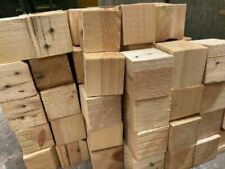

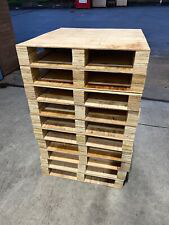

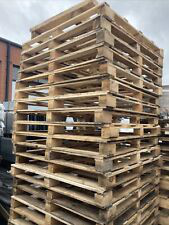

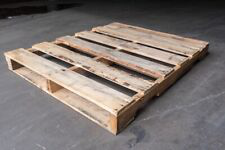

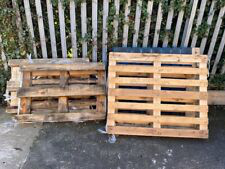

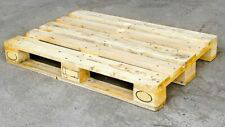

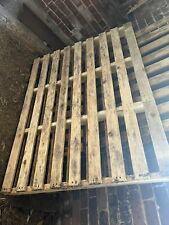

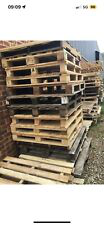

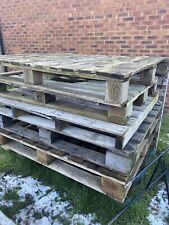

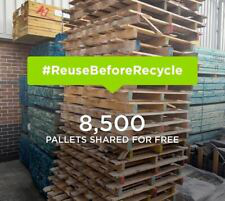

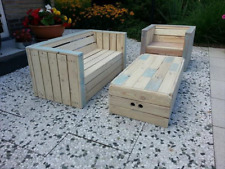

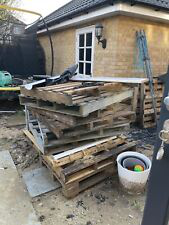

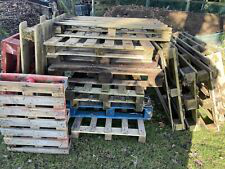

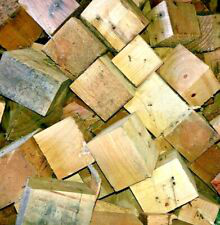

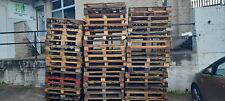

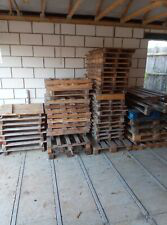

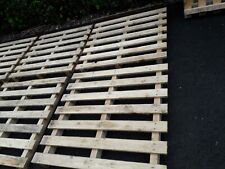

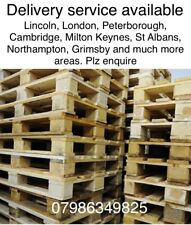

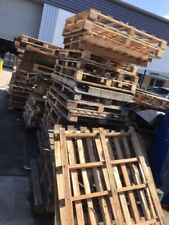

In [818]:
for i in range(1,20):
    images = container.find_all('img')
    example = images[i]
    a = example.attrs['src']
    response = requests.get(a)
    img = Image.open(BytesIO(response.content))
    display(img) 


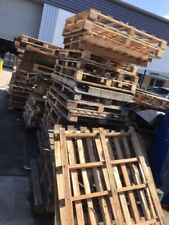

In [819]:
response = requests.get(a)
img = Image.open(BytesIO(response.content))
img 

In [820]:
import pandas as pd
import re
import requests, json, lxml


In [821]:
def predict_image(image):
    image_tensor = test_transforms(image).float()
    image_tensor = image_tensor.unsqueeze_(0)
    input = Variable(image_tensor)
    input = input.to(device)
    output = ebay_model(input)
    index = output.data.cpu().numpy().argmax()
    return index

In [822]:
len(prediction)

0

In [823]:
for i in range(1,len(images)):
    images = container.find_all('img')
    example = images[i]
    a = example.attrs['src']
   # response = requests.get(a)
    #img = Image.open(BytesIO(response.content))
    #display(img) 
    #print(predict_image(img))
    print(a)

https://i.ebayimg.com/thumbs/images/g/aacAAOSw7eBhcpES/s-l225.jpg
https://i.ebayimg.com/thumbs/images/g/jaEAAOSwzyRjuJGV/s-l225.jpg
https://i.ebayimg.com/thumbs/images/g/ZtkAAOSw1Ktjv9jN/s-l225.jpg
https://i.ebayimg.com/thumbs/images/g/cW8AAOSw0uZiCDrj/s-l225.jpg
https://i.ebayimg.com/thumbs/images/g/OEAAAOSwB8Bj43Xb/s-l225.jpg
https://i.ebayimg.com/thumbs/images/g/U~kAAOSwTW5iYqKY/s-l225.jpg
https://i.ebayimg.com/thumbs/images/g/3HMAAOSwl7pjA1oK/s-l225.jpg
https://i.ebayimg.com/thumbs/images/g/NWEAAOSwwdBjy6v2/s-l225.jpg
https://i.ebayimg.com/thumbs/images/g/KH0AAOSw7fVj0TuB/s-l225.jpg
https://i.ebayimg.com/thumbs/images/g/Q6QAAOSwAUBjvsik/s-l225.jpg
https://i.ebayimg.com/thumbs/images/g/f9UAAOSwghtjBd1q/s-l225.jpg
https://i.ebayimg.com/thumbs/images/g/xbwAAOSwqXZj5C7Z/s-l225.jpg
https://i.ebayimg.com/thumbs/images/g/dwoAAOSw4fNjy-jG/s-l225.jpg
https://i.ebayimg.com/thumbs/images/g/L3QAAOSwRodfvkP1/s-l225.jpg
https://i.ebayimg.com/thumbs/images/g/Vh8AAOSw5jtjf5iE/s-l225.jpg
https://i.

In [824]:
item_name = []
prices = []
links = []
location = []
prediction = []

for i in range(1,2):

    ebayUrl = "https://www.ebay.co.uk/sch/i.html?_nkw=wooden+pallets&_sop=12&_pgn="+str(i)
    html_page = requests.get(ebayUrl)
    soup = BeautifulSoup(html_page.content, "html.parser")
    container = soup.find('div', class_="srp-river srp-layout-inner")

    listings = soup.find_all('li', attrs={'class': 's-item'})

    for j in range(1,len(listings)):
        images = container.find_all('img')
        example = images[j]
        a = example.attrs['src']
        response = requests.get(a)
        img = Image.open(BytesIO(response.content))
        prod_pred = predict_image(img)
        prediction.append(prod_pred)
       # print(prod_pred)

    for listing in listings:
        prod_price = " "
        prod_link = " "
        prod_pred = " "

        for price in listing.find_all('span', attrs={'class':"s-item__price"}):
                prod_price = str(price.find(text=True, recursive=False))
            #    prod_price = int(re.sub(",","",prod_price.split("INR")[1].split(".")[0]))
                prices.append(prod_price)
                
        for link in listing.find_all('a', attrs={'class':"s-item__link"}, href=True):
                prod_link = link['href']
                prod_link_clean = prod_link.split("?")[0]
                links.append(prod_link_clean)

        for title in soup.select(".s-item__title span"):
            if "Shop on eBay" in title:
                pass
            else:
                item_name.append(title.text)
            

In [825]:
soup = BeautifulSoup(html_page.content, "html.parser")
container = soup.find('div', class_="srp-river srp-layout-inner")
images = container.find_all('img')
prediction = []


for j in range(1,len(images)):
    prod_pred = " "
    images = container.find_all('img')   
    example = images[j]
    a = example.attrs['src']
    response = requests.get(a)
    img = Image.open(BytesIO(response.content))
    prod_pred = predict_image(img)
    prediction.append(prod_pred)
    #print(prod_pred)

In [830]:
len(prediction)

68

In [831]:
df = pd.DataFrame({"Listing title": item_name[1:len(prices)], "Prices": prices[1:], "Link": links[1:], "Prediction": prediction})
df = df.iloc[1: , :]
display(df)

,Listing title,Prices,Link,Prediction
1,40 X EMPTY WOODEN PALLETS ALSO FOR FIRE WOOD KINDLING FURNITURE FENCING ETC,£1.60,https://www.ebay.co.uk/itm/325525460959,0
2,"USED WOODEN PALLETS, All Shapes and Sizes Available!",£0.99,https://www.ebay.co.uk/itm/195589538402,0
3,Wooden Pallets - Various - Free,£0.99,https://www.ebay.co.uk/itm/363725908965,0
4,New listingWOODEN PALLETS 1200mm x 1000mm - Collect from Uxbridge,£0.99,https://www.ebay.co.uk/itm/144935837717,0
5,New listing,£2.00,https://www.ebay.co.uk/itm/295519803921,0
...,...,...,...,...
63,"Used Wooden Pallets Ideal for Garden Furniture, DIY etc. - Various size",£5.00,https://www.ebay.co.uk/itm/114947397878,1
64,used wooden euro pallets,£1.79,https://www.ebay.co.uk/itm/233930371359,0
65,1x Used Dry Wooden Standard Size Pallets Collection Only,£5.00,https://www.ebay.co.uk/itm/295004273858,1
66,Wooden Pallets For Sale. Collection Only,£10.00,https://www.ebay.co.uk/itm/154566711473,1


In [753]:
from parsel import Selector
import httpx

item_url = []
seller_url = []
seller_name = []
item_price = []
item_photo = []
item_name = []
seller_loc = []

#https://scrapfly.io/blog/how-to-scrape-ebay/

def parse_item(sel: Selector):

    # parsing shortcuts to avoid repetition:
    css_join = lambda css: "".join(sel.css(css).getall()).strip()  # join all selected elements
    css = lambda css: sel.css(css).get("").strip()  # take first selected element and strip of leading/trailing spaces


    i_url = " "
    i_price = " "
    i_photo = " "
    s_name= " "
    s_url = " "
    i_name = " "
    s_loc = " "

    i_url = css('link[rel="canonical"]::attr(href)')
    i_p = css('span[itemprop="price"] .ux-textspans ::text')
    i_name = css_join("h1 span::text")
    s_name = css_join("div[data-testid=str-title] a ::text")
    s_url = css("div[data-testid=str-title] a::attr(href)").split("?")[0]
    i_photo = (sel.css('.ux-image-carousel-item.image img::attr("src")').getall())
 
    item_url.append(i_url)
    item_price.append(i_p)
    item_photo.append(i_photo)
    seller_name.append(s_name)
    seller_url.append(s_url)
    item_name.append(i_name)
    seller_loc.append(s_loc)

    #return seller_loc
    return item_name, item_url, item_price, seller_name, seller_url, item_photo


response = httpx.get("https://www.ebay.co.uk/itm/333304124806")
selector = Selector(response.text)
a = parse_item(selector)


In [755]:
selector

<Selector xpath=None data='<html xmlns:fb="http://www.facebook.c...'>

In [ ]:
for i in range(1,20):
    images = container.find_all('img')
    example = images[i]
    a = example.attrs['src']
    response = requests.get(a)
    img = Image.open(BytesIO(response.content))
    display(img) 

In [639]:
link_sample = links[0:10]

list_link = []
list_name = []
list_price = []
sell_name = []
sell_url = []
list_img = []

for link in link_sample:
    response = httpx.get(link)
    selector = Selector(response.text)
    list_name, list_link, list_price, sell_name, sell_url, list_img = parse_item(selector)
    sample_df = pd.DataFrame({"Listing Name": list_name, "Listing Link": list_link, "Listing Price": list_price, "Seller Name": sell_name, \
        "Seller Link": sell_url, "Main Image": list_img})
    sample_df = sample_df.iloc[1: , :]

In [640]:
sample_df

,Listing Name,Listing Link,Listing Price,Seller Name,Seller Link,Main Image
1,30 x Reclaimed Wooden Pallet Blocks DIY Projec...,https://www.ebay.co.uk/itm/333304128923,£19.99 each,TK Timber Products,https://www.ebay.co.uk/str/tktimberproducts,[https://i.ebayimg.com/images/g/aacAAOSw7eBhcp...
2,Wooden Ply Board Pallets 80cm x 74cm x 12cm - ...,https://www.ebay.co.uk/itm/325525460959,£1.60,8835buggsy,https://www.ebay.co.uk/usr/8835buggsy,[https://i.ebayimg.com/images/g/jaEAAOSwzyRjuJ...
3,40 X EMPTY WOODEN PALLETS ALSO FOR FIRE WOOD K...,https://www.ebay.co.uk/itm/195589538402,£0.99,trevormichaelpoole,https://www.ebay.co.uk/usr/trevormichaelpoole,[https://i.ebayimg.com/images/g/ZtkAAOSw1Ktjv9...
4,"USED WOODEN PALLETS, All Shapes and Sizes Avai...",https://www.ebay.co.uk/itm/363725908965,£0.99,gamers-0,https://www.ebay.co.uk/usr/gamers-0,[https://i.ebayimg.com/images/g/cW8AAOSw0uZiCD...
5,Wooden Pallets - Various - Free,https://www.ebay.co.uk/itm/144935837717,£0.99,MG_Caravans_Leisure_Store,https://www.ebay.co.uk/str/mgcaravansleisurestore,[https://i.ebayimg.com/images/g/OEAAAOSwB8Bj43...
6,WOODEN PALLETS 1200mm x 1000mm - Collect from ...,https://www.ebay.co.uk/itm/295519803921,£2.00,Deals Kiosk,https://www.ebay.co.uk/str/nimnikoutlet,[https://i.ebayimg.com/images/g/U~kAAOSwTW5iYq...
7,STANDARD WOODEN PALLETS 1000mm X 1200mm FOR FI...,https://www.ebay.co.uk/itm/275552379128,£3.00,wiry56,https://www.ebay.co.uk/usr/wiry56,[https://i.ebayimg.com/images/g/3HMAAOSwl7pjA1...
8,VARIOUS EMPTY WOODEN PALLETS ALSO FOR FIRE WOO...,https://www.ebay.co.uk/itm/134420290089,£2.40,holly052010,https://www.ebay.co.uk/usr/holly052010,[https://i.ebayimg.com/images/g/NWEAAOSwwdBjy6...
9,Mitcham - *FREE* Wooden Pallets Timber Good an...,https://www.ebay.co.uk/itm/266080260058,£0.99,roofingonline,https://www.ebay.co.uk/usr/roofingonline,[https://i.ebayimg.com/images/g/Q6QAAOSwAUBjvs...


In [647]:
import torch
import numpy as np
from torchvision import datasets, transforms
from torch.autograd import Variable

ebay_model = torch.load('ebay_model.pth')
sample_image =  '/Users/monikakrumina/Desktop/Images/image13.jpg'

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
test_transforms = transforms.Compose([transforms.Resize(224),
                                      transforms.ToTensor(),
                                     ])

In [662]:
def predict_image(image):
    image_tensor = test_transforms(image).float()
    image_tensor = image_tensor.unsqueeze_(0)
    input = Variable(image_tensor)
    input = input.to(device)
    output = ebay_model(input)
    index = output.data.cpu().numpy().argmax()
    return index


In [663]:
x =predict_image(img)
x

1

0


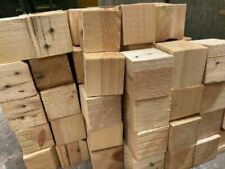

0


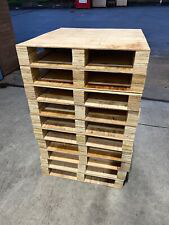

0


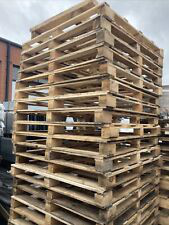

0


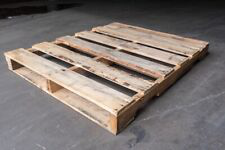

0


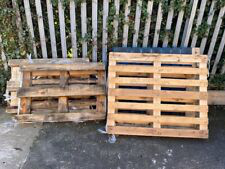

0


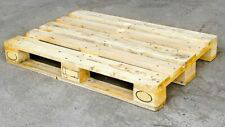

0


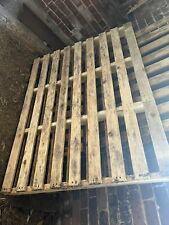

0


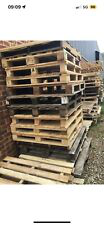

0


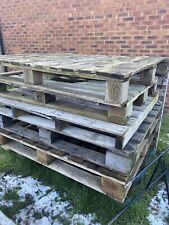

1


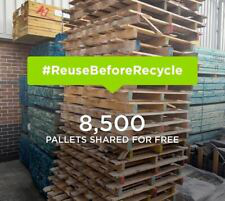

1


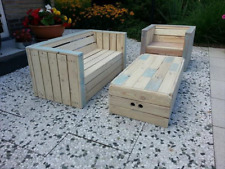

1


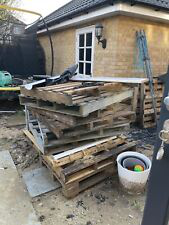

1


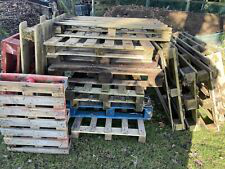

0


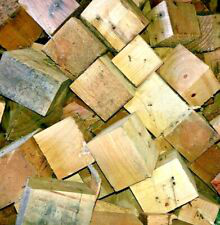

1


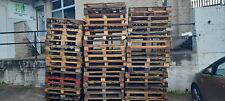

1


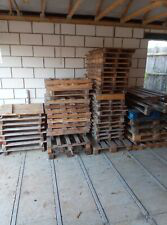

1


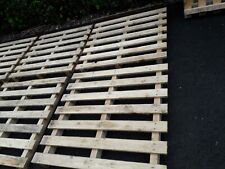

0


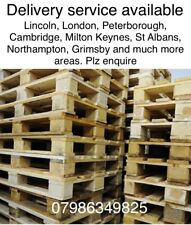

1


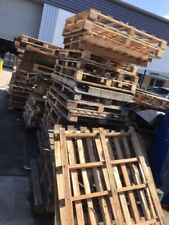

In [832]:
for i in range(1,20):
    images = container.find_all('img')
    example = images[i]
    a = example.attrs['src']
    response = requests.get(a)
    img = Image.open(BytesIO(response.content))
    print(predict_image(img))
    display(img)

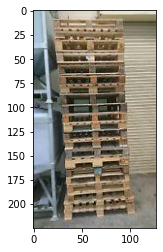

In [643]:
import matplotlib.pyplot as plt

plt.imshow(tsr_img.permute((1,2,0)))

In [644]:
import os 

data_transforms = {transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

data_dir = '/Users/monikakrumina/Desktop/Images/'
image_datasets = datasets.ImageFolder(data_dir, data_transforms)
dataloaders = torch.utils.data.DataLoader(image_datasets, batch_size=4,
                                             shuffle=True, num_workers=4)